# 1. Introduction

Torrid LHS 3844 b, a Galactic Voyager (an intergalactic cruiser) carrying many travellers between different galactics and while navigating near Alpha Centauri on its way to its primary destination, significant number of travelers were shifted to a different realm due to a spacetime distortion. The challenge is to determine which individuals were displaced (Transported).

For the project train & test dataset were given where train dataset contains independent and target attribute where test dataset only contains independent attribute and target attribute need to be predicted. For this project, TensorFlowDecisionForrest (TFDF) model used since the model is effective for the given tabular train and test dataset. Before training and evaluating the model different data exploration, visualization and preprocessing were performed.

In [1]:
# install tensorflow_decision_forests library and import other necessary libraries
import tensorflow as tf
!pip install tensorflow_decision_forests -qq
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 44.8 MB/s eta 0:00:00


# 2. Data Loading, Exploration, and Visualization

This section will initially load the dataset from my github repository where given dataset were previously stored. After that, data exploration, dataset statistics, and data visualization (specially for target variable and numeric attributes) will perform.

## 2.1 Load Dataset

In [2]:
# Load the dataset from github repository
given_train_dataset = "https://raw.githubusercontent.com/azad-nstu/CS591-ML-Assignment-1/main/train.csv"
given_test_dataset = "https://raw.githubusercontent.com/azad-nstu/CS591-ML-Assignment-1/main/test.csv"
given_train_df = pd.read_csv(given_train_dataset)
given_test_df = pd.read_csv(given_test_dataset)

## 2.2 Data Exploration

In [3]:
# Given dataset shape
print(f'Data Frame Shape (rows, columns): {given_train_df.shape}')
print(f'Data Frame Shape (rows, columns): {given_test_df.shape}')

Data Frame Shape (rows, columns): (8693, 14)
Data Frame Shape (rows, columns): (4277, 13)


In [4]:
# print the attributes of the given datasets
print(given_train_df.columns)
print(given_test_df.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')


In [5]:
# First 5 samples of given train dataset
given_train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
# Some basic information of the given train dataset
given_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## 2.3 Data Visualization

In [7]:
# Target Variable count
given_train_df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

Text(0.5, 1.0, 'Transported Count')

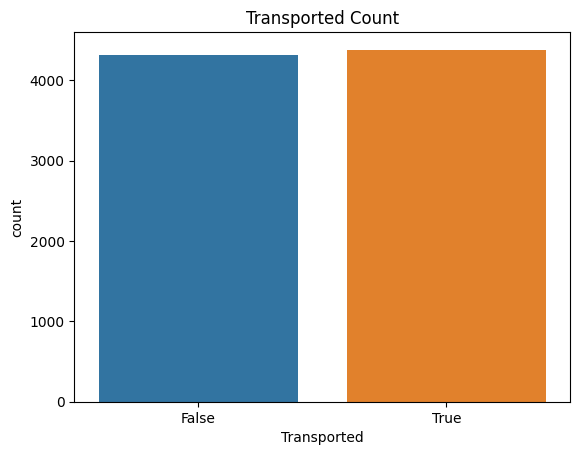

In [8]:
# Target Variable Visualization
sns.countplot(data=given_train_df, x="Transported").set_title("Transported Count")

From the target variable count plot, we can see that the target variable Transported contains the value of True and False and the class distribution is balanced.

In [9]:
# List of numeric features of the given train dataset
numeric_features = given_train_df.select_dtypes(include='number')
print(numeric_features)

       Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0     39.0          0.0        0.0           0.0     0.0     0.0
1     24.0        109.0        9.0          25.0   549.0    44.0
2     58.0         43.0     3576.0           0.0  6715.0    49.0
3     33.0          0.0     1283.0         371.0  3329.0   193.0
4     16.0        303.0       70.0         151.0   565.0     2.0
...    ...          ...        ...           ...     ...     ...
8688  41.0          0.0     6819.0           0.0  1643.0    74.0
8689  18.0          0.0        0.0           0.0     0.0     0.0
8690  26.0          0.0        0.0        1872.0     1.0     0.0
8691  32.0          0.0     1049.0           0.0   353.0  3235.0
8692  44.0        126.0     4688.0           0.0     0.0    12.0

[8693 rows x 6 columns]


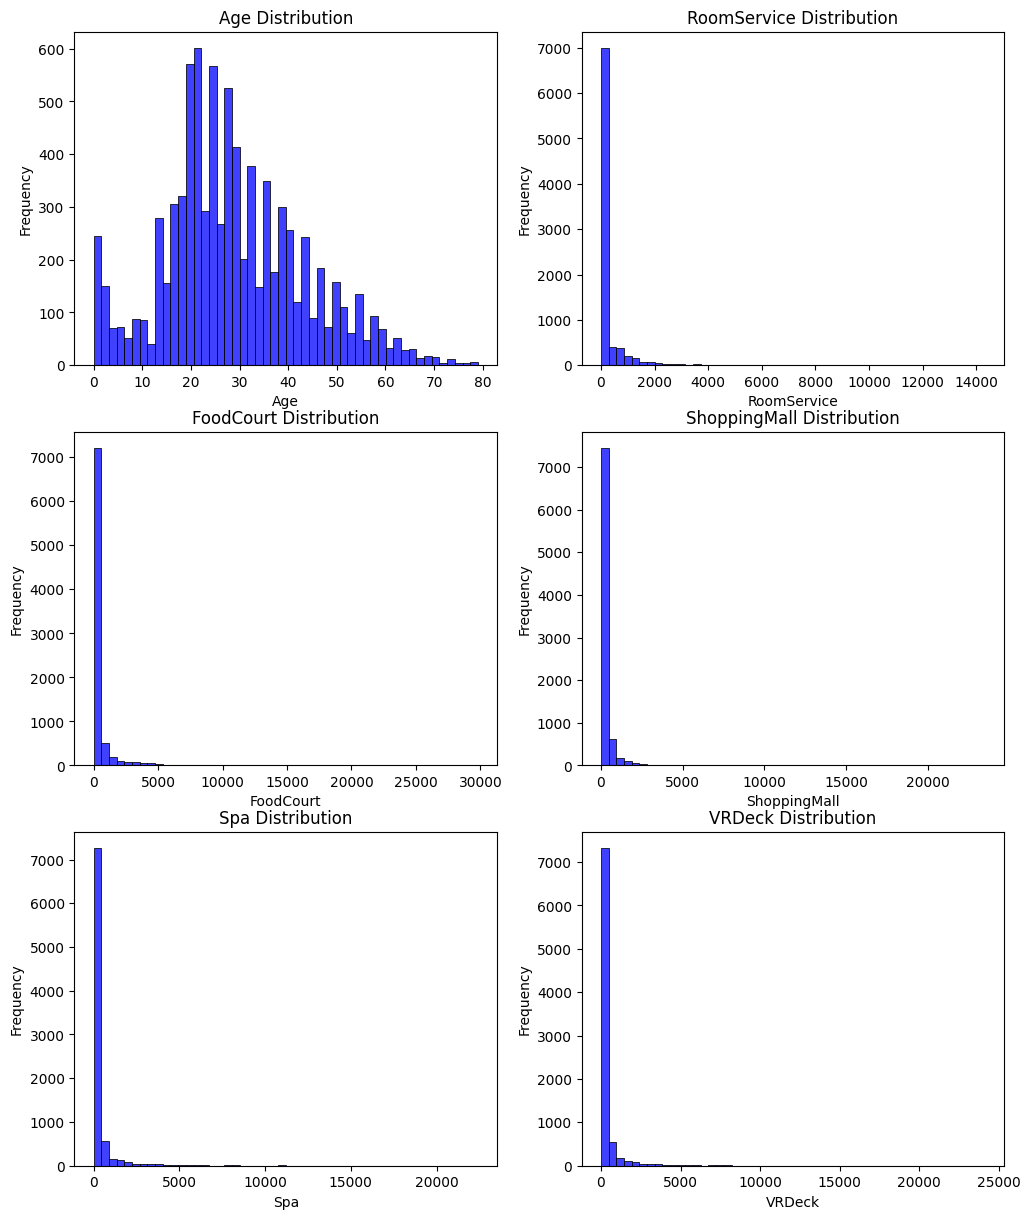

In [10]:
# Visualizing Numeric Features
# Create a 3x2 subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 6))
plt.subplots_adjust(top=2)

# List of feature names
features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Iterate through the features and create histplots in the subplots
for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    sns.histplot(given_train_df[feature], color='b', bins=50, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} Distribution')
    axes[row, col].set_xlabel(f'{feature}')
    axes[row, col].set_ylabel('Frequency')

# Show the plot
plt.show()

From the above figures, we can see that for Age attribute, the distribution seems normal, and for other 5 numeric attributes (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck), the distribution is Positive (Right) Skew.

# 3. Data Preprocessing

In [11]:
# Remove Name attribute (since it has not logical relation with the target variable) to avoid overfitting and to improve generalizability
given_train_df = given_train_df.drop(['Name'], axis=1)
given_train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [12]:
# Split PassengerId into group and position and drop PassengerID and position column
# I tried to utilize the group property because it could have a relation with the labelling of the target variable. Later we will see this in coorelation analysis
given_train_df[['group', 'position']] = given_train_df['PassengerId'].str.split('_', expand=True)
given_train_df.drop(columns=['PassengerId', 'position'], inplace=True)
given_train_df.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004


In [13]:
# group Variable count
given_train_df['group'].value_counts()

4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: group, Length: 6217, dtype: int64

### Frequency encoding of the group (created from PassengerId) attribute

I choose frequency encoding for this attribute because frequency disctribution can preserve the information of the frequencies of different categories of the attribute, is robust to outliers, and also could reduce the dimentionality

In [14]:
# Frequency encoding of the group attribute
frequency_map = given_train_df['group'].value_counts(normalize=True).to_dict()
given_train_df['group'] = given_train_df['group'].map(frequency_map)
given_train_df.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.000115
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0.000115
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0.000230
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0.000230
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0.000115


In [15]:
# group Variable count
given_train_df['group'].value_counts()

0.000115    4805
0.000230    1682
0.000345    1020
0.000460     412
0.000575     265
0.000805     231
0.000690     174
0.000920     104
Name: group, dtype: int64

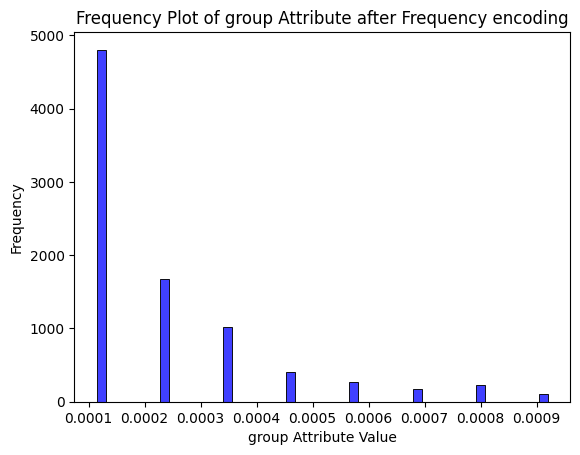

In [16]:
# Create a frequency plot of the group attribute
sns.histplot(given_train_df['group'], color='blue', bins=50)

# Set the title and axis labels
plt.title('Frequency Plot of group Attribute after Frequency encoding')
plt.xlabel('group Attribute Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

From the figure we can see that the dimestionality (different category values) reduced from around 6000 to only 8

## 3.1 Handling Missing Values

In [17]:
# Check Missing Values
Sum = given_train_df.isnull().sum()
Percentage = (given_train_df.isnull().sum()/given_train_df.isnull().count())
pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
HomePlanet,201,0.023122
CryoSleep,217,0.024963
Cabin,199,0.022892
Destination,182,0.020936
Age,179,0.020591
VIP,203,0.023352
RoomService,181,0.020821
FoodCourt,183,0.021051
ShoppingMall,208,0.023927
Spa,183,0.021051


### Numeric Columns

For age attribute, the distribution (From visualization in above figures) is normal. K-nearest neighbors (K-NN) imputation were selected to fill the missing values. Its advantage is it can preserve the relationships between the variables in the data. For other numeric attribute, the distribution is positive (Right) Skew, so median seems good to fill the missing values.

In [18]:
# Handling Missing values in Numeric column

# For Age attribute, the distribution seems normal (from visualization). So Mean could be choice. But, it could distort the distribution of the data by replacing all missing values with the mean value.
# So, here I choose K-nearest neighbors (K-NN) imputation is a method for imputing missing values by using the values of the nearest neighbors. It could better preserve the relationships between the age attribute and other attributes in the dataset.

from sklearn.impute import KNNImputer
# Initialize the K-NN imputer with a suitable number of neighbors (n_neighbors)
n_neighbors = 5
knn_imputer1 = KNNImputer(n_neighbors=n_neighbors)

given_train_df['Age'] = knn_imputer1.fit_transform(given_train_df[['Age']])

In [19]:
# From Other 5 numeric attributes (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck) distribution visual distribution, we can see that the attributes are Positive (Right) Skew. So for Skew distribution, Median imputation would be a good choice.
median_RoomService = given_train_df['RoomService'].median()
median_FoodCourt = given_train_df['FoodCourt'].median()
median_ShoppingMall = given_train_df['ShoppingMall'].median()
median_Spa = given_train_df['Spa'].median()
median_VRDeck = given_train_df['VRDeck'].median()

# Fill missing values with the median in each respective column
given_train_df['RoomService'].fillna(median_RoomService, inplace=True)
given_train_df['FoodCourt'].fillna(median_FoodCourt, inplace=True)
given_train_df['ShoppingMall'].fillna(median_ShoppingMall, inplace=True)
given_train_df['Spa'].fillna(median_Spa, inplace=True)
given_train_df['VRDeck'].fillna(median_VRDeck, inplace=True)

### Boolean Columns

Again For boolean attributes, K-nearest neighbors (K-NN) imputation were selected sinceit can preserve the relationships between the variables in the data.

In [20]:
# Fill Missing value in boolean column using K-nearest neighbors (K-NN) imputation to avoid bias
n_neighbors = 5
knn_imputer2 = KNNImputer(n_neighbors=n_neighbors)

given_train_df['VIP'] = knn_imputer2.fit_transform(given_train_df[['VIP']])
given_train_df['CryoSleep'] = knn_imputer2.fit_transform(given_train_df[['CryoSleep']])

## 3.2 Convert Boolean column to integer format

In [21]:
# Convert the boolean fields Transported, CryoSleep and VIP to int.
given_train_df['VIP'] = given_train_df['VIP'].astype(int)
given_train_df['CryoSleep'] = given_train_df['CryoSleep'].astype(int)
given_train_df['Transported'] = given_train_df['Transported'].astype(int)

## 3.3 Split String column Cabin into 3 new columns

Split cabin column into Deck, Cabin_num and Side attributes

In [22]:
given_train_df[['Deck', 'Cabin_num', 'Side']] = given_train_df['Cabin'].str.split('/', expand=True)
given_train_df.drop(columns=['Cabin'], inplace=True)

In [23]:
# Check Missing Values
Sum = given_train_df.isnull().sum()
Percentage = (given_train_df.isnull().sum()/given_train_df.isnull().count())
pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
HomePlanet,201,0.023122
CryoSleep,0,0.000000
Destination,182,0.020936
Age,0,0.000000
VIP,0,0.000000
RoomService,0,0.000000
FoodCourt,0,0.000000
ShoppingMall,0,0.000000
Spa,0,0.000000
VRDeck,0,0.000000


Existing missing values in all the column named HomePlanet, Destination, Deck, Cabin_num, Side are categorical that TFDF can natively handle

In [24]:
# Move the target attribute to the last column position
column_to_move = given_train_df['Transported']
given_train_df.drop(columns=['Transported'], inplace=True)
given_train_df['Transported'] = column_to_move
given_train_df.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group,Deck,Cabin_num,Side,Transported
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0.000115,B,0,P,0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,0.000115,F,0,S,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0.000230,A,0,S,0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0.000230,A,0,S,0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,0.000115,F,1,S,1


# 4. Dataset Splitting

Split the given train dataset into 80% for training and 20% validation

In [25]:
from sklearn.model_selection import train_test_split
def split_dataset(given_train_df, test_ratio=0.20):
  test_indices = np.random.rand(len(given_train_df)) < test_ratio
  return given_train_df[~test_indices], given_train_df[test_indices]

train_df, validation_df= split_dataset(given_train_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_df), len(validation_df)))

6976 examples in training, 1717 examples in testing.


In [26]:
# Convert the panda dataframe to TensorFlow dataset
train_tf_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="Transported")
validation_tf_ds = tfdf.keras.pd_dataframe_to_tf_dataset(validation_df, label="Transported")

# 5. Model Selection, Training, and Visualization

For the model, TensorFlow Decision Forests (TFDF) were selected because it would be effective for given tabular dataset, and can capture complex relationship in data. TFDF offers interpretability property. Its also easy to use and can handle some feature engineering on tabular data.

In [27]:
# Select TensorFlow Random Forest Model. For hyperparameter, previously defined template, benchmark_rank1 chosed that proved effective for many datasets
model = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1")
model.compile(metrics=["accuracy"])

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmp1z4u_ts7 as temporary training directory


## 5.2 Model Training

In [28]:
# Train the TensorFlow Random Forest model with Tenflow train dataset
model.fit(train_tf_ds)

Reading training dataset...
Training dataset read in 0:00:12.584476. Found 6976 examples.
Training model...
Model trained in 0:02:02.230638
Compiling model...
Model compiled.


## 5.3 Model Visualize

In [29]:
# Visualize the model that plot the first tree with depth 4
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=4)

# 6. Model Evaluation

## 6.1 Evlaluation using Out-of-Bag (OOB) data

Training logs could use to evaluate the accuracy of the model using the random training data that were not slected (out-of-bag dataset) during the training process. The model accuracy for Out-of-Bag dataset is 79.30%

In [30]:
# Model evlaluation using Out-of-Bag (OOB) data
inspector = model.make_inspector()
inspector.evaluation()

Evaluation(num_examples=6976, accuracy=0.7930045871559633, loss=0.4865290042074475, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

## 6.2 Evlaluation using Validation data

The validation accuracy for the model is 80.08%

In [31]:
# Model evlaluation using Validation set
evaluation = model.evaluate(x=validation_tf_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 1s 96ms/step - loss: 0.0000e+00 - accuracy: 0.8008
loss: 0.0000
accuracy: 0.8008


Evaluate the model with performance metrics like Accuracy, precision, recall, F1-score

In [32]:
# Accuracy, precision, recall, F1-score of the model for validation dataset
predictions = model.predict(validation_tf_ds)

# Transported' column is the one we are interested in
predicted_probabilities = predictions[:, 0]

# Apply threshold to convert probabilities to binary predictions
binary_predictions = (predicted_probabilities >= 0.5).astype(int)

# Create a DataFrame with binary predictions
binary = pd.DataFrame({'Transported': binary_predictions})

2/2 [==============================] - 0s 91ms/step


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predicted_labels = binary['Transported']
actual_labels = validation_df['Transported']

accuracy = accuracy_score(actual_labels, predicted_labels)
precision = precision_score(actual_labels, predicted_labels)
recall = recall_score(actual_labels, predicted_labels)
f1 = f1_score(actual_labels, predicted_labels)

print(f"======================================================")
print(f"   Performance Evaluation for Validation dataset")
print(f"======================================================")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"======================================================")

   Performance Evaluation for Validation dataset
Accuracy: 0.80
Precision: 0.81
Recall: 0.78
F1-Score: 0.80


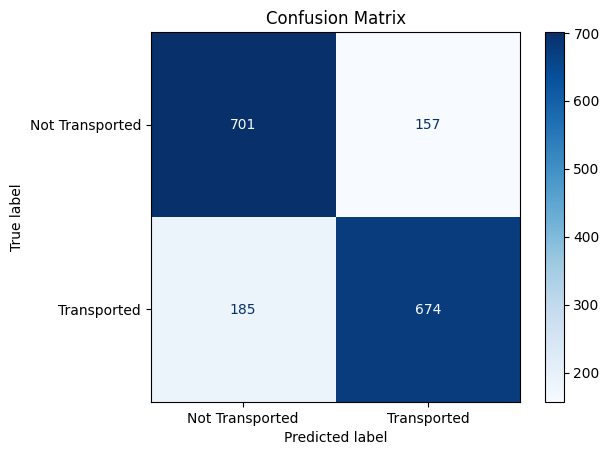

In [34]:
# Plot the Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create a confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=['Not Transported', 'Transported'])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, values_format=".4g")
plt.title('Confusion Matrix')
plt.show()

# 7. Feature Importance Analysis

In [35]:
# The input features with feature type & feature index
model.make_inspector().features()

["Age" (1; #0),
 "Cabin_num" (4; #1),
 "CryoSleep" (1; #2),
 "Deck" (4; #3),
 "Destination" (4; #4),
 "FoodCourt" (1; #5),
 "HomePlanet" (4; #6),
 "RoomService" (1; #7),
 "ShoppingMall" (1; #8),
 "Side" (4; #9),
 "Spa" (1; #10),
 "VIP" (1; #11),
 "VRDeck" (1; #12),
 "group" (1; #14)]

In [36]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES
	 INV_MEAN_MIN_DEPTH


In [37]:
# Feature importance with feature type, feature index, and importance score
model.make_inspector().variable_importances()

{'NUM_NODES': [("Age" (1; #0), 33710.0),
  ("Cabin_num" (4; #1), 23372.0),
  ("FoodCourt" (1; #5), 10647.0),
  ("CryoSleep" (1; #2), 8886.0),
  ("RoomService" (1; #7), 7279.0),
  ("ShoppingMall" (1; #8), 5521.0),
  ("Spa" (1; #10), 4581.0),
  ("Deck" (4; #3), 4368.0),
  ("Destination" (4; #4), 3162.0),
  ("Side" (4; #9), 2824.0),
  ("VRDeck" (1; #12), 2548.0),
  ("HomePlanet" (4; #6), 1909.0),
  ("group" (1; #14), 1182.0),
  ("VIP" (1; #11), 833.0)],
 'INV_MEAN_MIN_DEPTH': [("CryoSleep" (1; #2), 0.28751012614200366),
  ("Age" (1; #0), 0.1792602096231851),
  ("FoodCourt" (1; #5), 0.16223659886791503),
  ("RoomService" (1; #7), 0.14116681047264382),
  ("Cabin_num" (4; #1), 0.13481801246988284),
  ("Spa" (1; #10), 0.12102533404145892),
  ("Deck" (4; #3), 0.1132382679050505),
  ("HomePlanet" (4; #6), 0.1065932810303308),
  ("ShoppingMall" (1; #8), 0.1057597263951673),
  ("Side" (4; #9), 0.0976346462205636),
  ("VRDeck" (1; #12), 0.09726599315174499),
  ("Destination" (4; #4), 0.09666283423

In [38]:
model.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (14):
	Age
	Cabin_num
	CryoSleep
	Deck
	Destination
	FoodCourt
	HomePlanet
	RoomService
	ShoppingMall
	Side
	Spa
	VIP
	VRDeck
	group

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.    "CryoSleep"  0.287510 ################
    2.          "Age"  0.179260 #######
    3.    "FoodCourt"  0.162237 ######
    4.  "RoomService"  0.141167 ####
    5.    "Cabin_num"  0.134818 ###
    6.          "Spa"  0.121025 ##
    7.         "Deck"  0.113238 ##
    8.   "HomePlanet"  0.106593 #
    9. "ShoppingMall"  0.105760 #
   10.         "Side"  0.097635 #
   11.       "VRDeck"  0.097266 #
   12. 

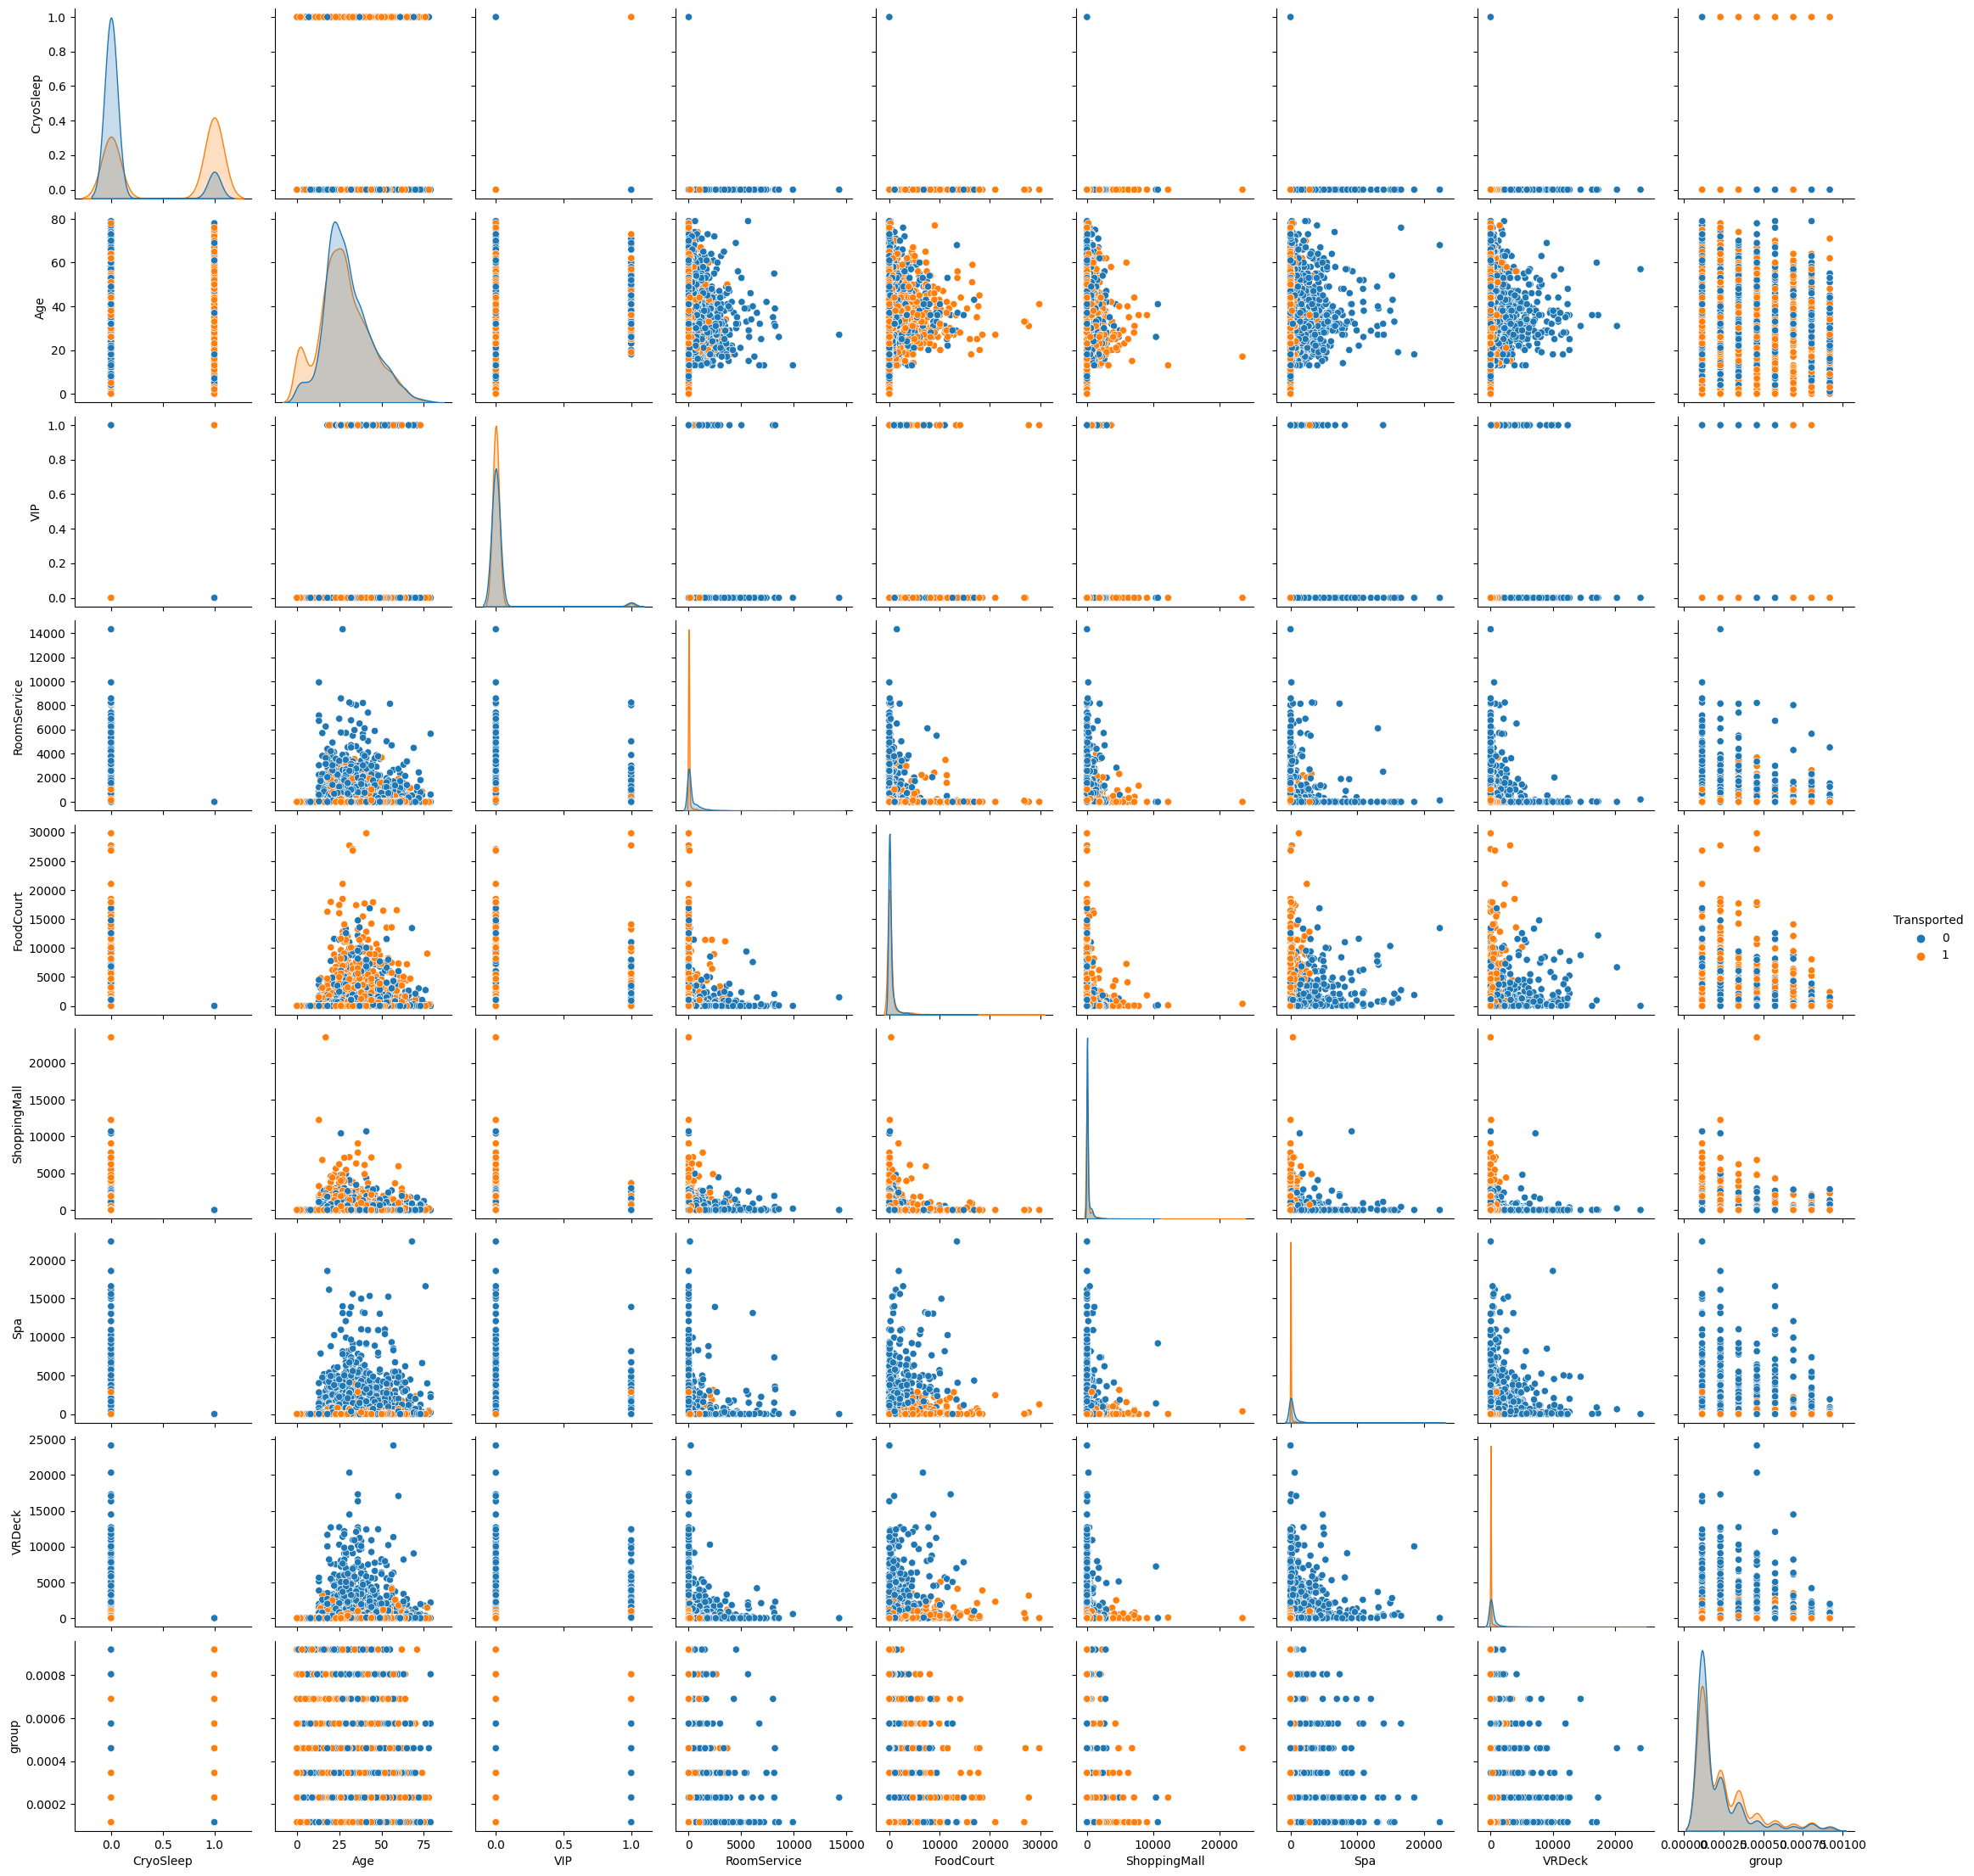

In [39]:
# Grid of scatter plots, with one plot for each pair of variables in the data frame to show how they are coorelated
sns.pairplot(given_train_df, hue="Transported")

<ipython-input-40-46957147b396>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = given_train_df.corr()['Transported'].plot(kind='bar',title='correlation of target variable to features')


Text(0, 0.5, 'correlation')

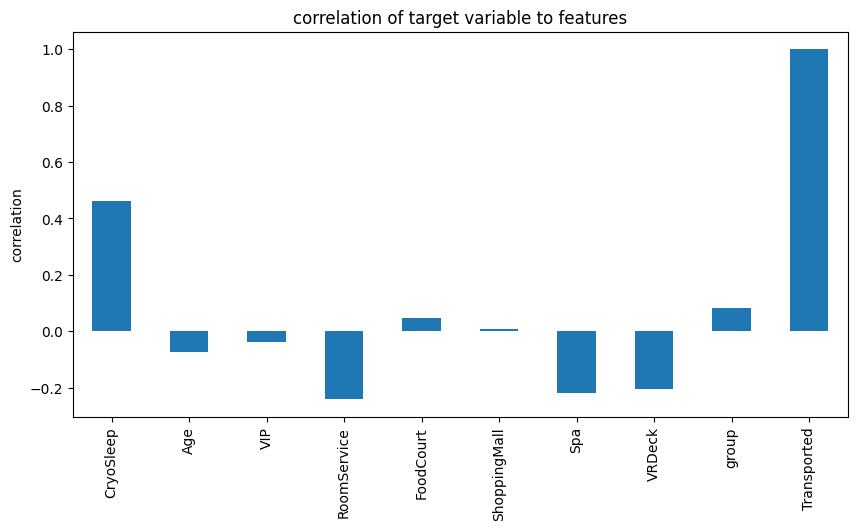

In [40]:
# Correlation of different numeric attributes with target variable
plt.figure(figsize=(10,5))
ax = given_train_df.corr()['Transported'].plot(kind='bar',title='correlation of target variable to features')
ax.set_ylabel('correlation')

<ipython-input-41-1ab37d430db2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = given_train_df.corr()


<Axes: >

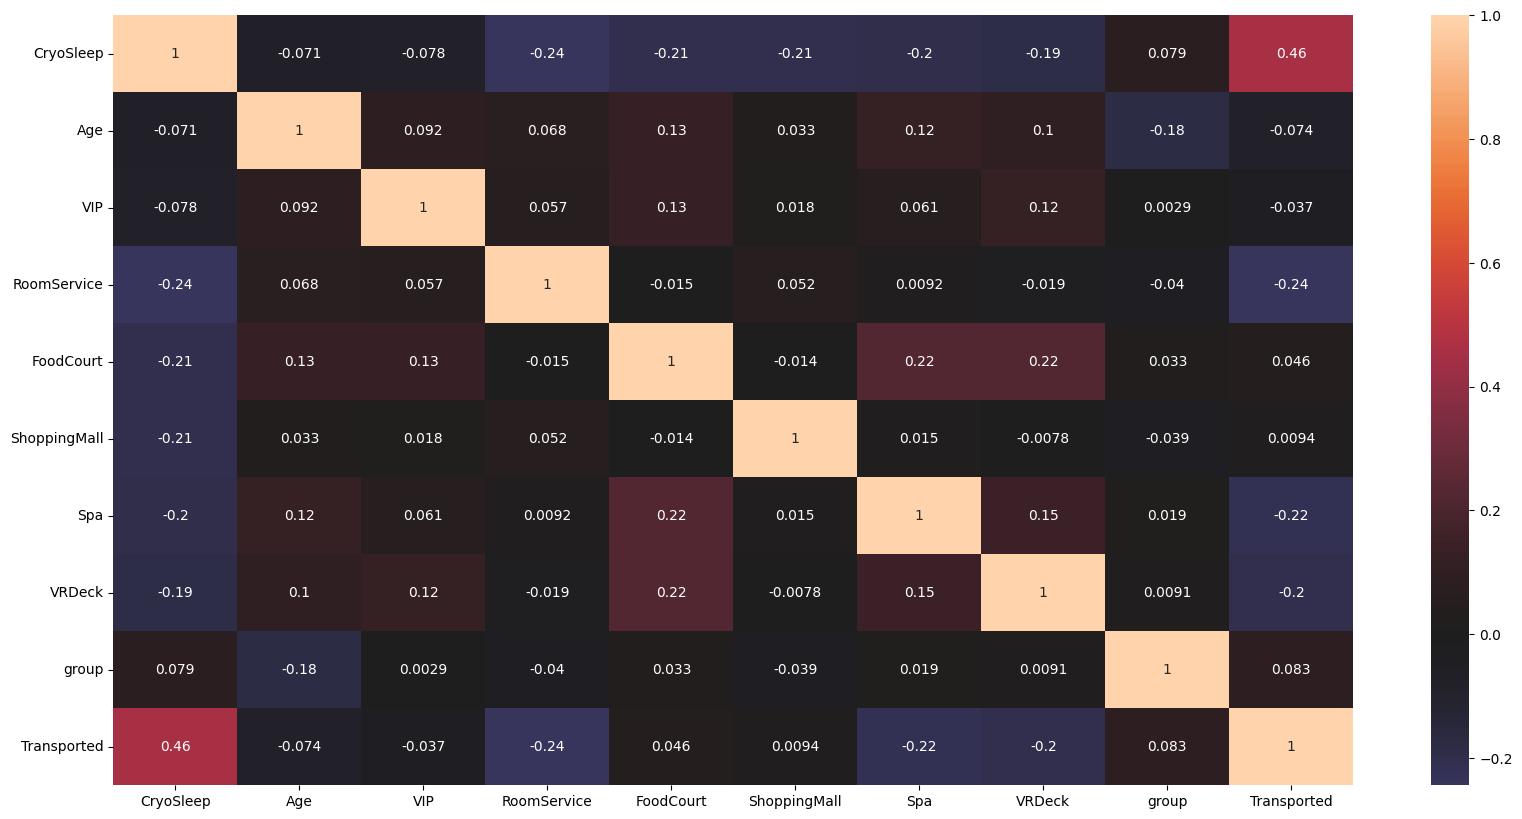

In [41]:
#Heatmap Correlation to show the coorelation among different attributes
cor = given_train_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(data=cor, annot=True, center=0)

In [42]:
# Sorted coorelation values of different attributes with target variable
cor["Transported"].sort_values(ascending=False)

Transported     1.000000
CryoSleep       0.460132
group           0.082644
FoodCourt       0.045583
ShoppingMall    0.009391
VIP            -0.037261
Age            -0.074249
VRDeck         -0.204874
Spa            -0.218545
RoomService    -0.241124
Name: Transported, dtype: float64

# 8. Predictions and Submission

## 8.1 Prepare the test dataset

Prepared the test dataset following the same steps that followed for train dataset

In [43]:
# Load the given_test_dataset from github repository
given_test_dataset = "https://raw.githubusercontent.com/azad-nstu/CS591-ML-Assignment-1/main/test.csv"
given_test_df = pd.read_csv(given_test_dataset)

In [44]:
# Store the PassengerId attribute for future concatanation with the predicted Transported output
passenger_id = given_test_df['PassengerId']

In [45]:
# Remove Name attribute (since it has not logical relation with the output) to avoid overfitting and to improve generalizability
given_test_df = given_test_df.drop(['Name'], axis=1)

In [46]:
# Split PassengerId into group and position and drop PassengerID and position column
given_test_df[['group', 'position']] = given_test_df['PassengerId'].str.split('_', expand=True)
given_test_df.drop(columns=['PassengerId', 'position'], inplace=True)

In [47]:
frequency_map_test = given_test_df['group'].value_counts(normalize=True).to_dict()
#given_train_df['group' + '_freq_encoded'] = given_train_df['group'].map(frequency_map)
given_test_df['group'] = given_test_df['group'].map(frequency_map_test)
given_test_df.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0.000234
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,0.000234
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,0.000234
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,0.000234
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,0.000234


In [48]:
# Handling Missing values in Numeric column

# For Age attribute, the distribution seems normal (from visualization). So Mean could be choice. But, it could distort the distribution of the data by replacing all missing values with the mean value.
# So, here I choose K-nearest neighbors (K-NN) imputation is a method for imputing missing values by using the values of the nearest neighbors. It could better preserve the relationships between the age attribute and other attributes in the dataset.

from sklearn.impute import KNNImputer
# Initialize the K-NN imputer with a suitable number of neighbors (n_neighbors)
n_neighbors = 5
knn_imputer3 = KNNImputer(n_neighbors=n_neighbors)

given_test_df['Age'] = knn_imputer3.fit_transform(given_test_df[['Age']])

In [49]:
# From Other 5 numeric attributes (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck) distribution visual distribution, we can see that the attributes are Positive (Right) Skew. So for Skew distribution, Median imputation would be a good choice.
median_RoomService = given_test_df['RoomService'].median()
median_FoodCourt = given_test_df['FoodCourt'].median()
median_ShoppingMall = given_test_df['ShoppingMall'].median()
median_Spa = given_test_df['Spa'].median()
median_VRDeck = given_test_df['VRDeck'].median()

# Fill missing values with the median in each respective column
given_test_df['RoomService'].fillna(median_RoomService, inplace=True)
given_test_df['FoodCourt'].fillna(median_FoodCourt, inplace=True)
given_test_df['ShoppingMall'].fillna(median_ShoppingMall, inplace=True)
given_test_df['Spa'].fillna(median_Spa, inplace=True)
given_test_df['VRDeck'].fillna(median_VRDeck, inplace=True)

In [50]:
# Fill missing value in boolean column
n_neighbors = 5
knn_imputer4 = KNNImputer(n_neighbors=n_neighbors)

given_test_df['VIP'] = knn_imputer4.fit_transform(given_test_df[['VIP']])
given_test_df['CryoSleep'] = knn_imputer4.fit_transform(given_test_df[['CryoSleep']])

In [51]:
# Convert the boolean fields CryoSleep and VIP to int.
given_test_df['VIP'] = given_test_df['VIP'].astype(int)
given_test_df['CryoSleep'] = given_test_df['CryoSleep'].astype(int)

In [52]:
# Split String column Cabin into 3 new columns
given_test_df[['Deck', 'Cabin_num', 'Side']] = given_test_df['Cabin'].str.split('/', expand=True)
given_test_df.drop(columns=['Cabin'], inplace=True)

In [53]:
# Check Missing Values
# TFDF can handle the missing values in categorical attribute like HomePlanet, Destination, Deck, Cabin_num, Side
Sum = given_test_df.isnull().sum()
Percentage = (given_test_df.isnull().sum()/given_test_df.isnull().count())
pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
HomePlanet,87,0.020341
CryoSleep,0,0.000000
Destination,92,0.021510
Age,0,0.000000
VIP,0,0.000000
RoomService,0,0.000000
FoodCourt,0,0.000000
ShoppingMall,0,0.000000
Spa,0,0.000000
VRDeck,0,0.000000


In [54]:
# Convert pd dataframe to tf dataset
test_tf_ds = tfdf.keras.pd_dataframe_to_tf_dataset(given_test_df)

## 8.2 Predictions using trained model

In [55]:
# Predictions by trained model for given test dataset
pred = model.predict(test_tf_ds)
n_pred = (pred > 0.5).astype(bool)
n_pred

5/5 [==============================] - 1s 134ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

## 8.3 Formatting the prediction for submission

In [56]:
# Concatanate the previously stored PassengerId with the predicted Transported values
output = pd.DataFrame({'PassengerId': passenger_id, 'Transported': n_pred.squeeze()})
output.head(5)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [57]:
# Export the DataFrame to a CSV file
output.to_csv('Abul_Kalam_Azad_Submission.csv', index=False)

In [58]:
# Target variable statistics of submission file
output_df = pd.read_csv('Abul_Kalam_Azad_Submission.csv')
output_df['Transported'].value_counts()

True     2252
False    2025
Name: Transported, dtype: int64

## Download the Abul_Kalam_Azad_Submission.csv file to local machine

In [59]:
from google.colab import files
files.download("Abul_Kalam_Azad_Submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conclusions


For the problem with given datasets, after performing different data preprocessing techniques, I used TFDF algorithms. Performance evaluation showed that the achieved accuracy for training and validation dataset were around 80%. The train dataset has 8693 samples. The accuracy would increase if the dataset have more samples. During the work, it was confusing to select imputation techniques for handling missing values of different attributes. Also, it was little challenging to utilize the group property of PassengerId atrribute and handling cabin attribute. However, the performance would increase with other feature engineering or encoding techniques, and also for other ML algorithms.

# References
[1] “Build, train and evaluate models with tensorflow decision forests,” TensorFlow, https://www.tensorflow.org/decision_forests/tutorials/beginner_colab (accessed Nov. 01, 2023).